In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [21]:
data=pd.read_csv("aw_fb_data.csv")

In [22]:
df=data.copy()

In [23]:
df.shape

(6264, 20)

In [24]:
df.dtypes.value_counts()

float64    14
int64       4
object      2
dtype: int64

In [25]:
df.activity.value_counts()/df.shape[0]

Lying             0.220147
Running 7 METs    0.177842
Running 5 METs    0.159962
Running 3 METs    0.151660
Sitting           0.148467
Self Pace walk    0.141922
Name: activity, dtype: float64

In [26]:
df.columns

Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [27]:
df.activity.unique()

array(['Lying', 'Sitting', 'Self Pace walk', 'Running 3 METs',
       'Running 5 METs', 'Running 7 METs'], dtype=object)

In [28]:
df.head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [29]:
df.activity=df.activity.map({'Sitting':'Sitting','Self Pace walk':'walking','Running 3 METs':'Running',
       'Running 5 METs':'Running', 'Running 7 METs':'Running'})

In [30]:
df=df.drop(["Unnamed: 0","X1"],axis=1)
df=df.dropna(axis=0)

In [31]:
df.shape

(4885, 18)

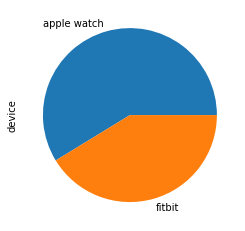

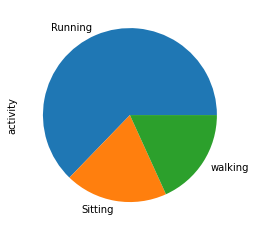

In [32]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

In [33]:
activite_types=[df[df['activity']=='Sitting'],
df[df['activity']=='walking'],
df[df['activity']=='Running']]

/home/kallelanis/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kallelanis/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kallelanis/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

/home/kallelanis/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kallelanis/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kallelanis/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

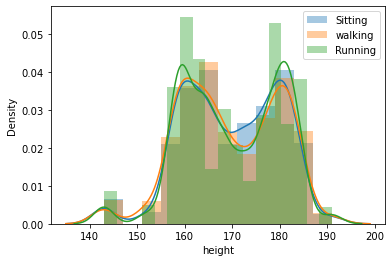

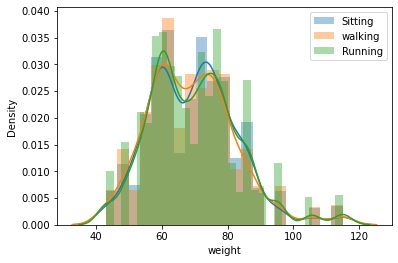

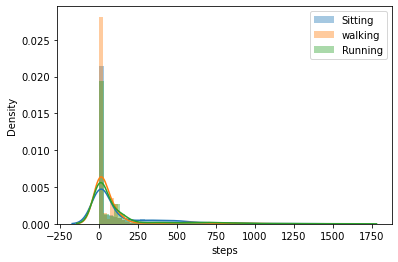

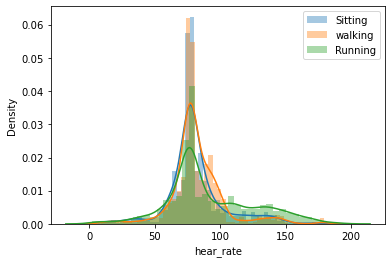

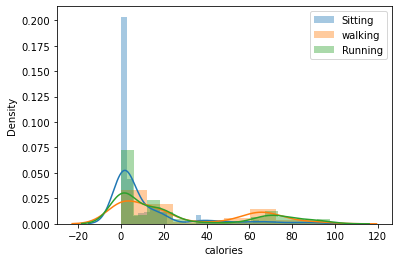

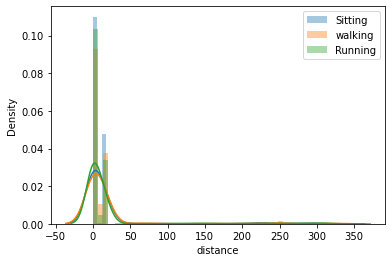

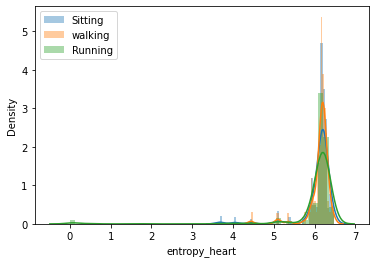

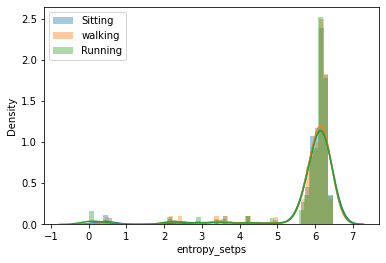

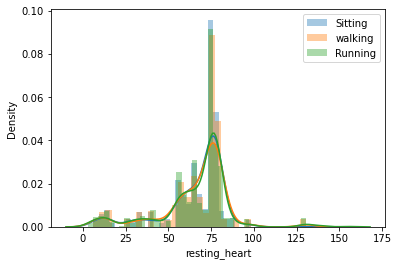

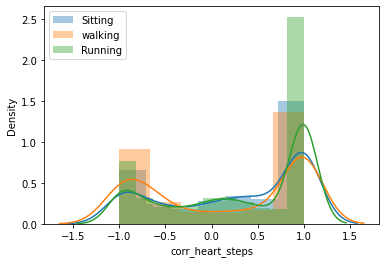

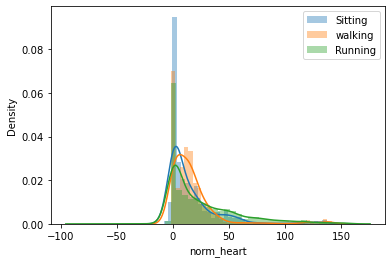

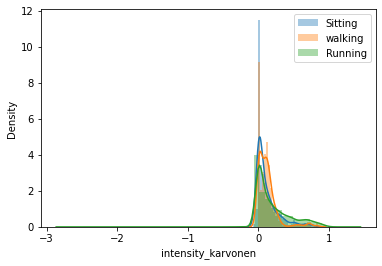

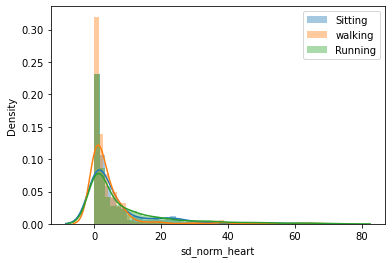

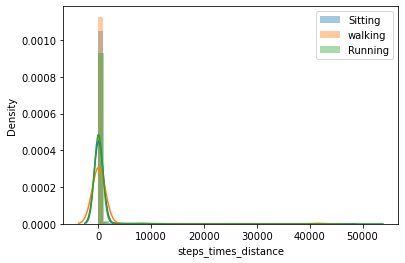

In [34]:
for col_i in df.select_dtypes(float):
    plt.figure()
    for col in activite_types:
        sns.distplot(col[col_i], label=col.activity.iloc[0])
    plt.legend()

<AxesSubplot:xlabel='gender', ylabel='count'>

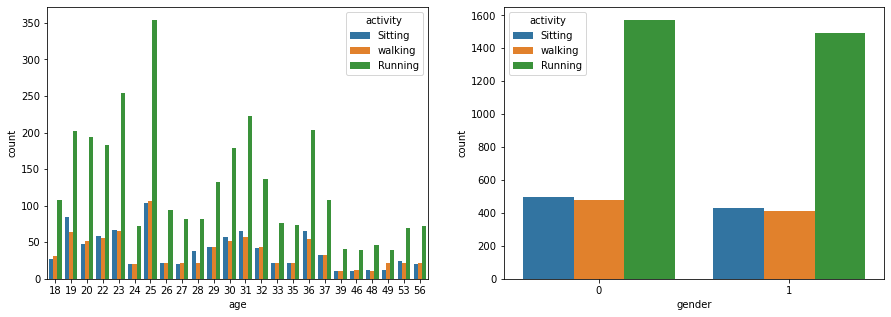

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(ax=axs[0],x='age', hue='activity', data=df)
sns.countplot(ax=axs[1],x='gender', hue='activity', data=df)

<AxesSubplot:xlabel='device', ylabel='activity'>

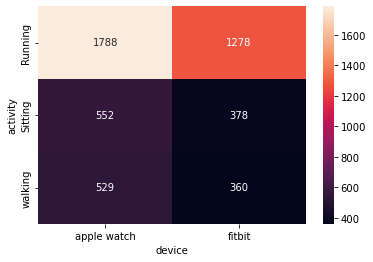

In [37]:
sns.heatmap(pd.crosstab(df["activity"],df["device"]),annot=True,fmt='d')

In [39]:
df.activity.value_counts()

Running    3066
Sitting     930
walking     889
Name: activity, dtype: int64

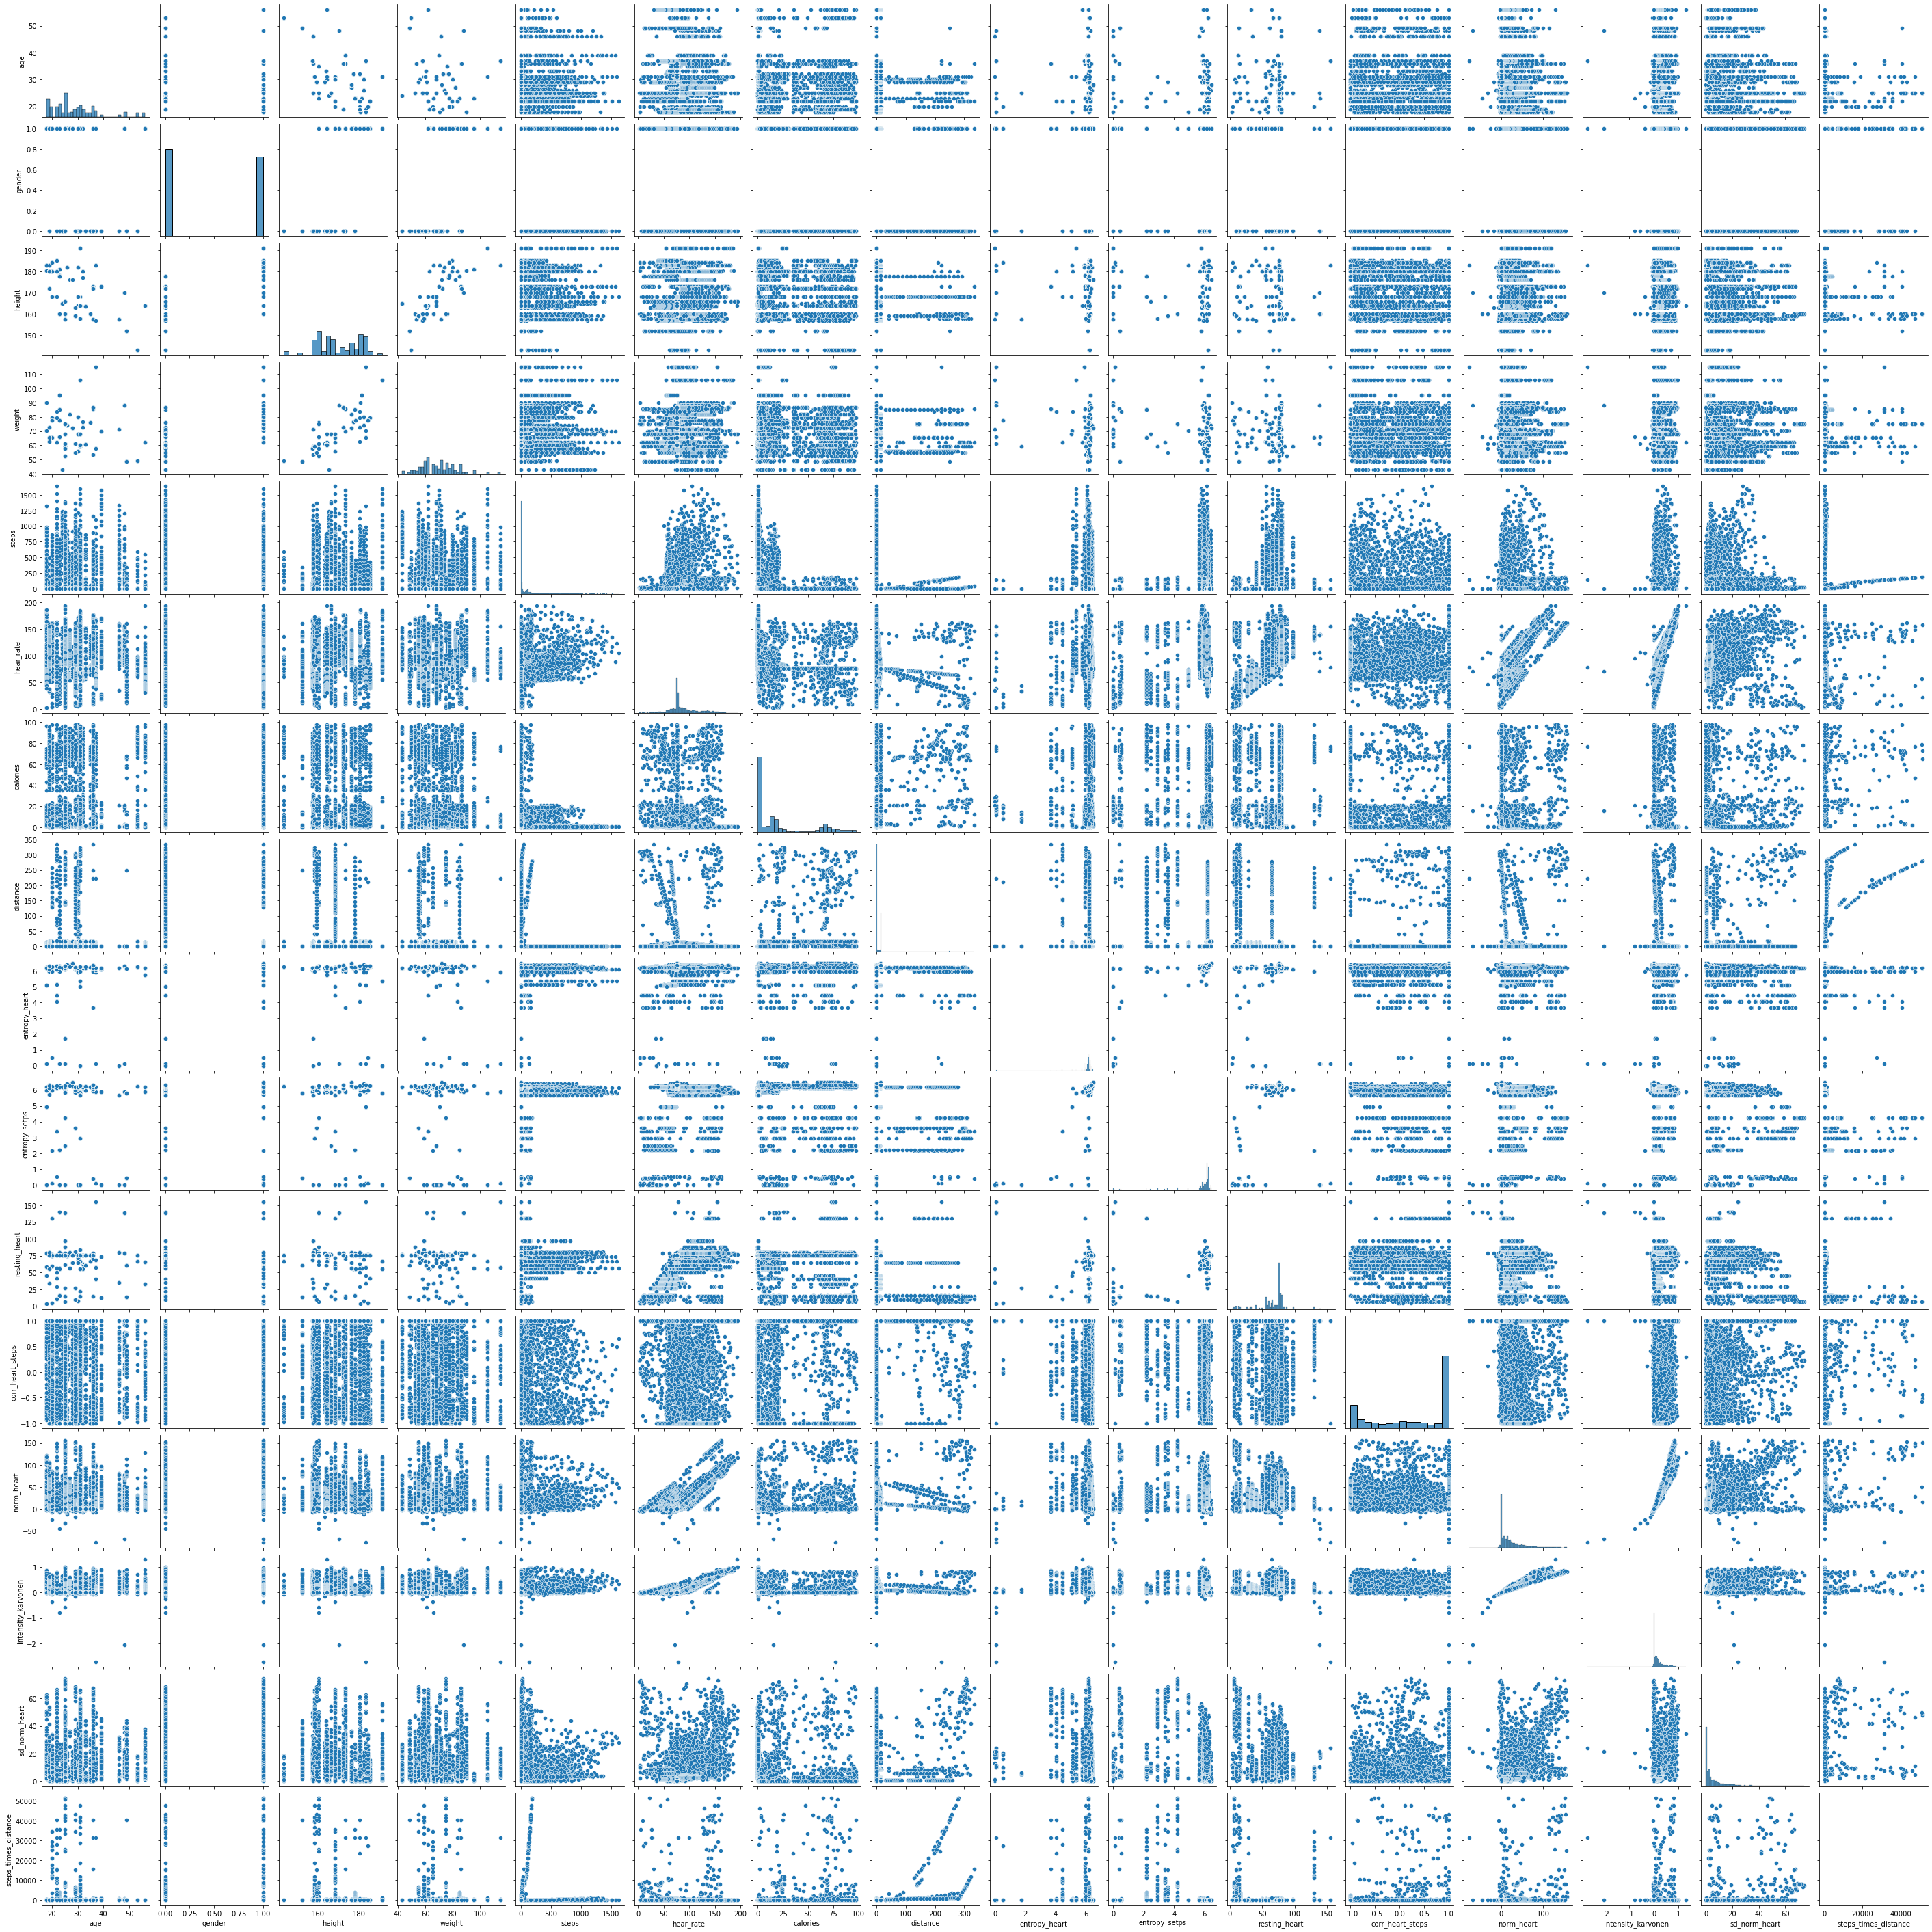

In [40]:
sns.pairplot(df)

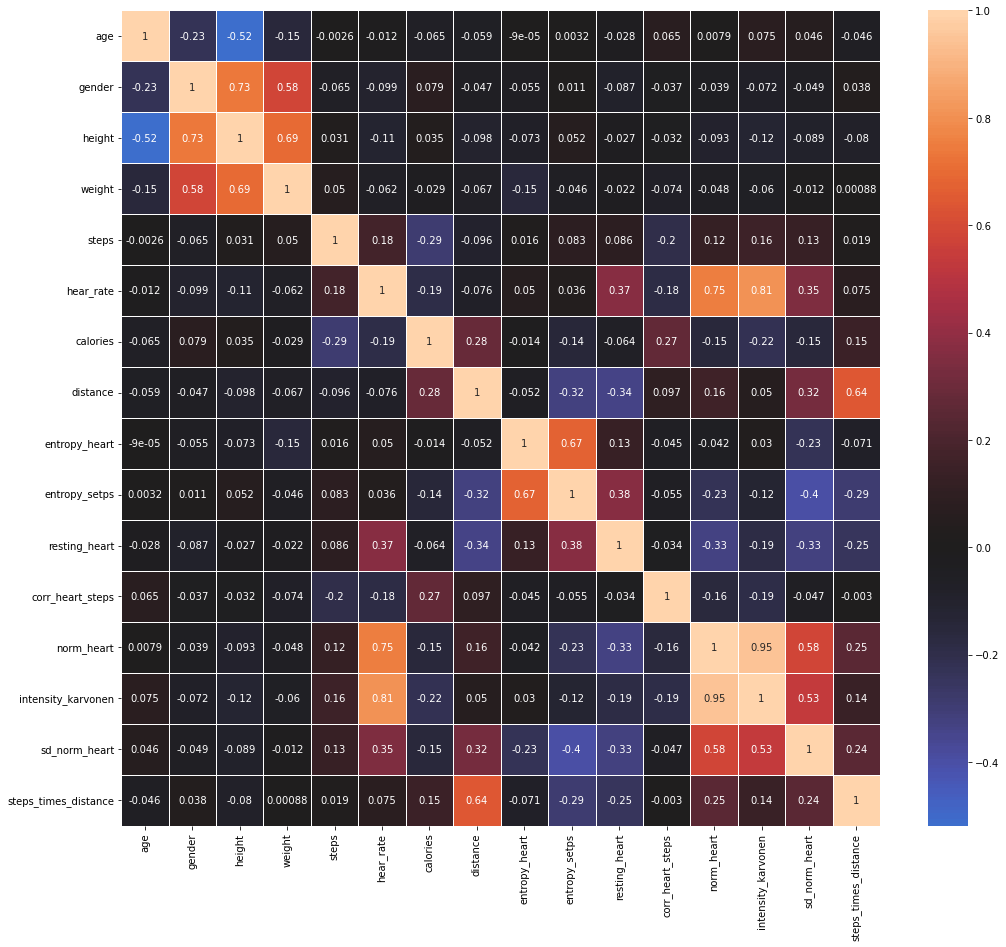

In [42]:
ax = plt.subplots(figsize=(17, 15))
ax = sns.heatmap(df.corr(),linewidths=0.5,center=0,annot=True)

In [43]:
df_walking=df[df["activity"]=='walking']
df_sitting=df[df["activity"]=='Sitting']
df_Running=df[df["activity"]=='Running']

In [44]:
print(df_sitting.shape)
print(df_Running.shape)

(930, 18)
(3066, 18)


In [45]:
dfSitting_balance= df_sitting.sample(df_walking.shape[0])

In [46]:
dfRunning_balance= df_Running.sample(df_walking.shape[0])

In [47]:
def t_test(col):
    alpha = 0.05
    stat, p = f_oneway(df_sitting[col], df_walking[col],df_Running[col])
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

In [48]:
df_num=df.iloc[:,:-2]
df_num.dtypes.value_counts()

float64    14
int64       2
dtype: int64

In [49]:
from scipy.stats import f_oneway

In [50]:
for col in df_num:
    print(f'{col :-<50} {t_test(col)}')

age----------------------------------------------- 0
gender-------------------------------------------- 0
height-------------------------------------------- 0
weight-------------------------------------------- 0
steps--------------------------------------------- H0 Rejetée
hear_rate----------------------------------------- H0 Rejetée
calories------------------------------------------ H0 Rejetée
distance------------------------------------------ 0
entropy_heart------------------------------------- H0 Rejetée
entropy_setps------------------------------------- H0 Rejetée
resting_heart------------------------------------- 0
corr_heart_steps---------------------------------- H0 Rejetée
norm_heart---------------------------------------- H0 Rejetée
intensity_karvonen-------------------------------- H0 Rejetée
sd_norm_heart------------------------------------- H0 Rejetée
steps_times_distance------------------------------ 0


In [51]:
df.describe()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance
count,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000
mean,29.163767,0.477789,169.709560,69.631075,113.149777,88.048714,22.731841,14.422282,6.052709,5.767668,65.928420,0.273048,22.120295,0.171342,7.869288,590.802279
std,8.890924,0.499558,10.290243,13.417853,228.376953,29.937231,29.239045,47.434601,0.686772,1.200215,20.812448,0.774189,29.475714,0.223899,12.323291,3976.812085
min,18.000000,0.000000,143.000000,43.000000,1.000000,2.222222,0.056269,0.000440,0.000000,0.000000,3.000000,-1.000000,-76.000000,-2.714286,0.000000,0.000690
25%,23.000000,0.000000,160.000000,60.000000,4.848941,75.688811,0.736000,0.021569,6.108524,5.928982,59.000000,-0.520706,1.250000,0.010543,0.144174,0.905112
50%,28.000000,0.000000,168.000000,68.000000,9.729323,77.270411,9.779467,0.167992,6.189825,6.168980,75.000000,0.513898,11.752941,0.092156,2.789275,12.902400
75%,33.000000,1.000000,180.000000,77.300000,109.000000,100.250000,36.000000,15.700615,6.247928,6.247928,76.138701,1.000000,30.602564,0.246398,9.289929,88.205416
max,56.000000,1.000000,191.000000,115.000000,1635.000000,194.333333,97.500000,335.000000,6.475733,6.475733,155.000000,1.000000,156.319444,1.297980,74.457929,51520.000000


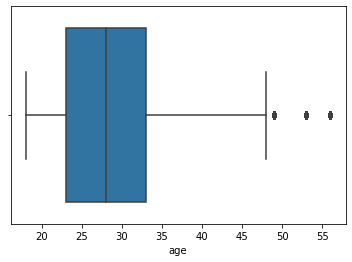

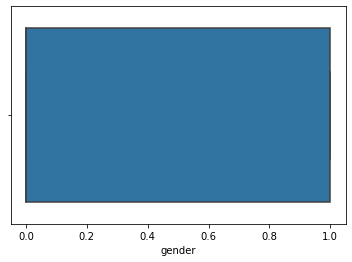

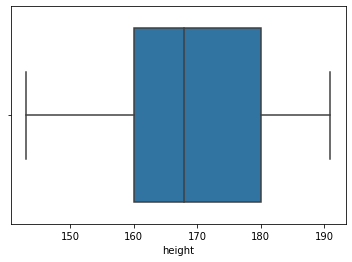

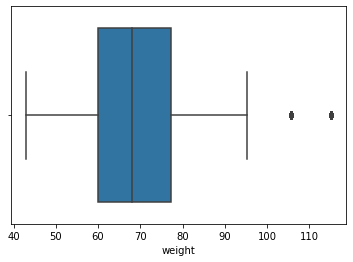

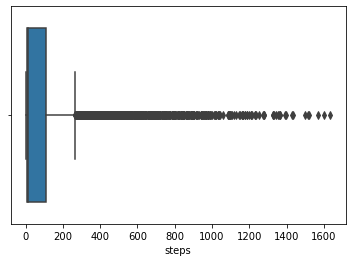

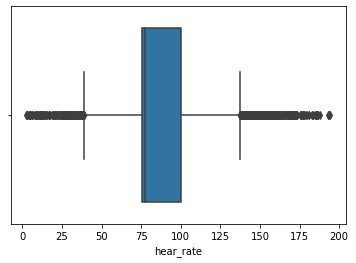

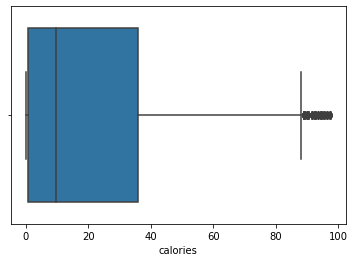

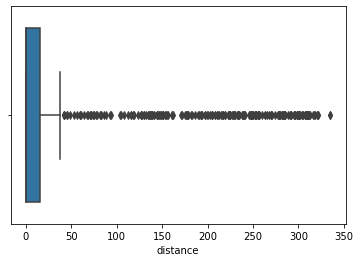

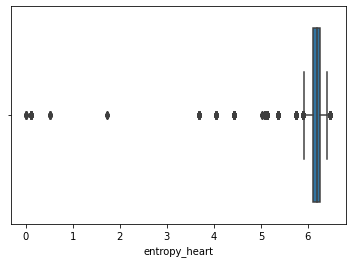

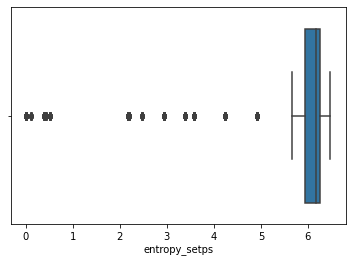

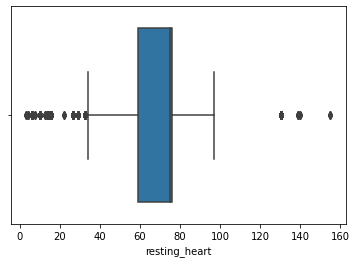

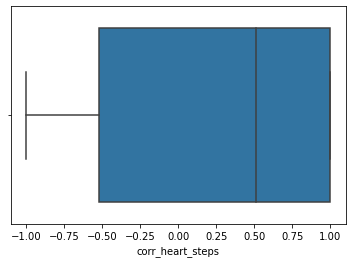

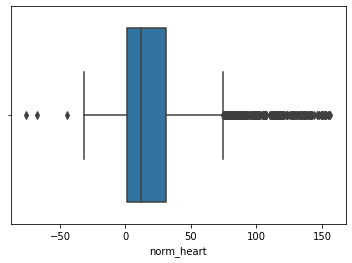

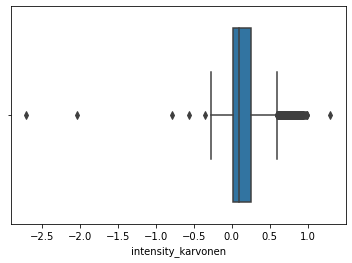

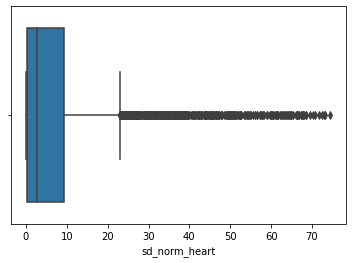

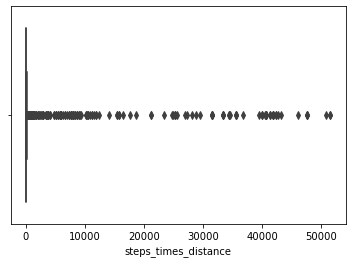

In [52]:
for i in df.iloc[:,:-2]:
    plt.figure()
    sns.boxplot(x=df[i])

In [53]:
#L'extraction des variables significative et non-corrélés entre eux
df=df[["steps","calories","entropy_heart","entropy_setps","corr_heart_steps","intensity_karvonen","sd_norm_heart","device","activity"]]

In [54]:
df.isna().sum()

steps                 0
calories              0
entropy_heart         0
entropy_setps         0
corr_heart_steps      0
intensity_karvonen    0
sd_norm_heart         0
device                0
activity              0
dtype: int64

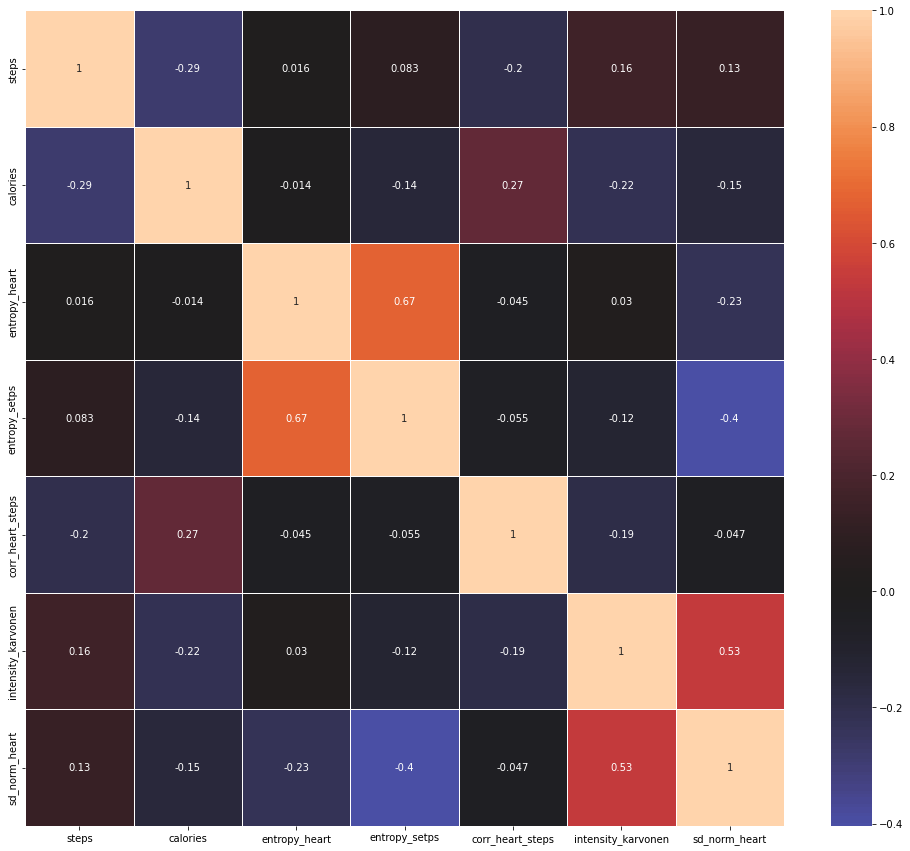

In [55]:
ax = plt.subplots(figsize=(17, 15))
ax = sns.heatmap(df.corr(),linewidths=0.5,center=0,annot=True)

In [56]:
#Fonction de détéction des outliers
def outlier_limits(col):
  Q3, Q1 = np.nanpercentile(col, [75, 25])
  IQR = Q3 - Q1
  UL = Q3 + 1.5*IQR
  LL = Q1 - 1.5*IQR
  return UL, LL

In [57]:
#outliers => nan
for column in df.columns:
  if df[column].dtype != 'object':
    UL, LL = outlier_limits(df[column])
    df[column] = np.where((df[column] > UL) | (df[column] < LL), np.nan, df[column]) 

/tmp/ipykernel_4911/4237520717.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where((df[column] > UL) | (df[column] < LL), np.nan, df[column])


In [58]:
df.isna().sum()

steps                 638
calories              152
entropy_heart         476
entropy_setps         474
corr_heart_steps        0
intensity_karvonen    380
sd_norm_heart         493
device                  0
activity                0
dtype: int64

In [59]:
df=df.dropna(axis=0)

In [60]:
df.shape

(3140, 9)

In [61]:
#Subdivision du dataset en deux (apple watch et fitbit)
df_apple=df.loc[df["device"]=="apple watch"]
df_fitbit=df.loc[df["device"]=="fitbit"]
df_apple=df_apple.drop("device",axis=1)
df_fitbit=df_fitbit.drop("device",axis=1)

In [62]:
df_apple

,steps,calories,entropy_heart,entropy_setps,corr_heart_steps,intensity_karvonen,sd_norm_heart,activity
5,14.290909,11.495667,6.221612,6.116349,1.000000,0.140448,0.264722,Sitting
6,14.994805,12.166222,6.221612,6.116349,1.000000,0.141068,0.264722,Sitting
7,15.698701,12.836778,6.221612,6.116349,1.000000,0.141688,0.264722,Sitting
8,16.402597,13.507333,6.221612,6.116349,1.000000,0.142308,0.264722,Sitting
9,17.106494,14.177889,6.221612,6.116349,1.000000,0.142928,0.264722,Sitting
...,...,...,...,...,...,...,...,...
3619,119.000000,0.756000,6.162427,5.655310,-0.270562,0.337893,2.931990,Running
3620,90.000000,0.756000,6.162427,5.655310,0.682364,0.348133,2.931990,Running
3621,119.000000,0.756000,6.162427,5.655310,0.801849,0.358372,2.931990,Running
3622,64.000000,0.758000,6.162427,5.655310,0.882916,0.368611,2.931990,Running


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
Apple_trainset, Apple_testset = train_test_split(df_apple, test_size=0.2)

In [65]:
fitbit_trainset, fitbit_testset = train_test_split(df_fitbit, test_size=0.2)

In [66]:
Apple_trainset['activity'].value_counts()

Running    861
walking    324
Sitting    255
Name: activity, dtype: int64

In [67]:
fitbit_trainset['activity'].value_counts()

Running    640
Sitting    218
walking    214
Name: activity, dtype: int64

In [68]:
def encodage(df):
    code = {'Running':2,'walking':1,'Sitting':0}
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)  
    return df

In [69]:
def imputation(df):
    df = df.dropna(axis=0)
    return  df

In [70]:
from sklearn.preprocessing import StandardScaler

In [72]:
def preprocessing(df):
    df = encodage(df)
    df = imputation(df)
    X = df.drop("activity", axis=1)
    y = df.loc[:,"activity"]
    print(y.value_counts())
    return X, y

In [73]:
XApple_train, yApple_train = preprocessing(Apple_trainset)

2    861
1    324
0    255
Name: activity, dtype: int64


/home/kallelanis/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [74]:
Xfitbit_train, yfitbit_train = preprocessing(fitbit_trainset)

2    640
0    218
1    214
Name: activity, dtype: int64


In [75]:
Xfitbit_test, yfitbit_test = preprocessing(fitbit_testset)

2    164
0     60
1     44
Name: activity, dtype: int64


In [76]:
XApple_test, yApple_test = preprocessing(Apple_testset)

2    216
1     83
0     61
Name: activity, dtype: int64


In [77]:
def standardisation(df):
    scaler=StandardScaler()
    X=scaler.fit_transform(df)
    return X
XApple_train=standardisation(XApple_train)
Xfitbit_test=standardisation(Xfitbit_test)
XApple_test=standardisation(XApple_test)
Xfitbit_train=standardisation(Xfitbit_train)

In [78]:
Xfitbit_test

array([[-1.2650992 , -0.49020768, -0.90300703, ...,  0.30639444,
        -0.46863275, -0.36142186],
       [-0.78911312,  0.00350017, -0.61681779, ...,  0.30639444,
        -0.45301391, -0.36181546],
       [ 0.37149591,  1.05674357,  0.75775037, ...,  0.30639444,
        -0.41349883, -0.36363013],
       ...,
       [ 0.34363897,  0.82634657, -0.90300703, ...,  0.30639444,
        -0.40992314, -0.36142186],
       [ 1.48568057, -1.29659715,  0.21880082, ...,  0.30639444,
        -0.37822554, -0.3629333 ],
       [ 1.36614013, -1.37888179, -0.61681779, ...,  0.30639444,
         1.65333045,  0.46371232]])

In [79]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [80]:
KNN=KNeighborsClassifier()
SVM=SVC()

In [81]:
def evaluation(model,Xtrain,Ytrain,Xtest,Ytest):
    model.fit(Xtrain, Ytrain)
    ypred = model.predict(Xtest)
    print(confusion_matrix(Ytest, ypred))
    print(classification_report(Ytest, ypred))
    print("Le score du modéle sur les données d'entrainement {}".format(model.score(Xtrain,Ytrain)))
    print("Le score du modéle sur les données de test {}".format(model.score(Xtest,Ytest)))

In [82]:
models={"SVM":SVM,
       "KNN":KNN}

In [83]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [84]:
print("evaluation sur apple watch")
for name, model in models.items():
    print(name)
    evaluation(model,XApple_train,yApple_train,XApple_test,yApple_test)

evaluation sur apple watch
SVM
[[ 13   8  40]
 [  2  37  44]
 [  2   8 206]]
              precision    recall  f1-score   support

           0       0.76      0.21      0.33        61
           1       0.70      0.45      0.54        83
           2       0.71      0.95      0.81       216

    accuracy                           0.71       360
   macro avg       0.72      0.54      0.56       360
weighted avg       0.72      0.71      0.67       360

Le score du modéle sur les données d'entrainement 0.7256944444444444
Le score du modéle sur les données de test 0.7111111111111111
KNN
[[ 26   8  27]
 [  3  65  15]
 [ 11  14 191]]
              precision    recall  f1-score   support

           0       0.65      0.43      0.51        61
           1       0.75      0.78      0.76        83
           2       0.82      0.88      0.85       216

    accuracy                           0.78       360
   macro avg       0.74      0.70      0.71       360
weighted avg       0.77      0.78  

In [85]:
print("evaluation sur fitbit")
for name, model in models.items():
    print(name)
    evaluation(model,Xfitbit_train,yfitbit_train,Xfitbit_test,yfitbit_test)

evaluation sur fitbit
SVM
[[ 21   6  33]
 [  4  40   0]
 [  0   2 162]]
              precision    recall  f1-score   support

           0       0.84      0.35      0.49        60
           1       0.83      0.91      0.87        44
           2       0.83      0.99      0.90       164

    accuracy                           0.83       268
   macro avg       0.83      0.75      0.76       268
weighted avg       0.83      0.83      0.81       268

Le score du modéle sur les données d'entrainement 0.855410447761194
Le score du modéle sur les données de test 0.832089552238806
KNN
[[ 36   6  18]
 [  2  42   0]
 [ 12   3 149]]
              precision    recall  f1-score   support

           0       0.72      0.60      0.65        60
           1       0.82      0.95      0.88        44
           2       0.89      0.91      0.90       164

    accuracy                           0.85       268
   macro avg       0.81      0.82      0.81       268
weighted avg       0.84      0.85      0.8

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
gridApple=GridSearchCV(KNN,{'n_neighbors':np.arange(1,15).tolist()},scoring="accuracy",cv=5)
gridFitbit=GridSearchCV(KNN,{'n_neighbors':np.arange(1,15).tolist()},scoring="accuracy",cv=5)

In [88]:
gridApple.fit(XApple_train, yApple_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]},
             scoring='accuracy')

In [89]:
gridFitbit.fit(Xfitbit_train, yfitbit_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]},
             scoring='accuracy')

In [90]:
print(gridApple.best_params_)

{'n_neighbors': 1}


In [91]:
print(gridFitbit.best_params_)

{'n_neighbors': 1}


In [92]:
y_predApple = gridApple.predict(XApple_test)

In [93]:
y_predFitbit = gridFitbit.predict(Xfitbit_test)

In [94]:
print(classification_report(yApple_test, y_predApple))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        61
           1       0.87      0.90      0.89        83
           2       0.91      0.91      0.91       216

    accuracy                           0.87       360
   macro avg       0.83      0.83      0.83       360
weighted avg       0.87      0.87      0.87       360



In [95]:
print(classification_report(yfitbit_test, y_predFitbit))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        60
           1       0.93      0.89      0.91        44
           2       0.94      0.91      0.93       164

    accuracy                           0.89       268
   macro avg       0.87      0.88      0.87       268
weighted avg       0.90      0.89      0.89       268

